# Rozhodovací stromy pro regresi a ensemble metody

  * V tomto notebooku si budeme hrát s populárním datasetem stahnutým z [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).
  * Jedná se o údaje o domech a jejich cenách. Cílem je předpovědět **cenu domu (příznak SalePrice)** na základě celkem 79 příznaků.

### Sloupce v datasetu jsou (anglicky):

  * **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
  * **MSSubClass**: The building class
  * **MSZoning**: The general zoning classification
  * **LotFrontage**: Linear feet of street connected to property
  * **LotArea**: Lot size in square feet
  * **Street**: Type of road access
  * **Alley**: Type of alley access
  * **LotShape**: General shape of property
  * **LandContour**: Flatness of the property
  * **Utilities**: Type of utilities available
  * **LotConfig**: Lot configuration
  * **LandSlope**: Slope of property
  * **Neighborhood**: Physical locations within Ames city limits
  * **Condition1**: Proximity to main road or railroad
  * **Condition2**: Proximity to main road or railroad (if a second is present)
  * **BldgType**: Type of dwelling
  * **HouseStyle**: Style of dwelling
  * **OverallQual**: Overall material and finish quality
  * **OverallCond**: Overall condition rating
  * **YearBuilt**: Original construction date
  * **YearRemodAdd**: Remodel date
  * **RoofStyle**: Type of roof
  * **RoofMatl**: Roof material
  * **Exterior1st**: Exterior covering on house
  * **Exterior2nd**: Exterior covering on house (if more than one material)
  * **MasVnrType**: Masonry veneer type
  * **MasVnrArea**: Masonry veneer area in square feet
  * **ExterQual**: Exterior material quality
  * **ExterCond**: Present condition of the material on the exterior
  * **Foundation**: Type of foundation
  * **BsmtQual**: Height of the basement
  * **BsmtCond**: General condition of the basement
  * **BsmtExposure**: Walkout or garden level basement walls
  * **BsmtFinType1**: Quality of basement finished area
  * **BsmtFinSF1**: Type 1 finished square feet
  * **BsmtFinType2**: Quality of second finished area (if present)
  * **BsmtFinSF2**: Type 2 finished square feet
  * **BsmtUnfSF**: Unfinished square feet of basement area
  * **TotalBsmtSF**: Total square feet of basement area
  * **Heating**: Type of heating
  * **HeatingQC**: Heating quality and condition
  * **CentralAir**: Central air conditioning
  * **Electrical**: Electrical system
  * **1stFlrSF**: First Floor square feet
  * **2ndFlrSF**: Second floor square feet
  * **LowQualFinSF**: Low quality finished square feet (all floors)
  * **GrLivArea**: Above grade (ground) living area square feet
  * **BsmtFullBath**: Basement full bathrooms
  * **BsmtHalfBath**: Basement half bathrooms
  * **FullBath**: Full bathrooms above grade
  * **HalfBath**: Half baths above grade
  * **Bedroom**: Number of bedrooms above basement level
  * **Kitchen**: Number of kitchens
  * **KitchenQual**: Kitchen quality
  * **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
  * **Functional**: Home functionality rating
  * **Fireplaces**: Number of fireplaces
  * **FireplaceQu**: Fireplace quality
  * **GarageType**: Garage location
  * **GarageYrBlt**: Year garage was built
  * **GarageFinish**: Interior finish of the garage
  * **GarageCars**: Size of garage in car capacity
  * **GarageArea**: Size of garage in square feet
  * **GarageQual**: Garage quality
  * **GarageCond**: Garage condition
  * **PavedDrive**: Paved driveway
  * **WoodDeckSF**: Wood deck area in square feet
  * **OpenPorchSF**: Open porch area in square feet
  * **EnclosedPorch**: Enclosed porch area in square feet
  * **3SsnPorch**: Three season porch area in square feet
  * **ScreenPorch**: Screen porch area in square feet
  * **PoolArea**: Pool area in square feet
  * **PoolQC**: Pool quality
  * **Fence**: Fence quality
  * **MiscFeature**: Miscellaneous feature not covered in other categories
  * **MiscVal**: $Value of miscellaneous feature
  * **MoSold**: Month Sold
  * **YrSold**: Year Sold
  * **SaleType**: Type of sale
  * **SaleCondition**: Condition of sale

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house-prices-train.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## První pokus o použití DecisionTreeRegressor

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
dt = DecisionTreeRegressor(max_depth=3)
#dt.fit(data.drop(columns=['SalePrice']), data.SalePrice)

  * Potřebujeme převést textové příznaky (`dtype = object`) na příznaky číselné.
  * Zkusme nejprve nastavit jejich typ na *kategoriální* (`dtype = category`). Pandas si pak tyto příznaky interně ukládá jako číselné. 
  * Jako kategoriální lze cháat pouze příznaky *s ne moc růnými hodnotami* (anpř. jméno není vhodné).

In [5]:
str_cols = data.select_dtypes('object').columns
print('There are {} columns with string values'.format(len(str_cols)))
data[str_cols].nunique()

There are 43 columns with string values


MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

  * V našem případě lze brát jako kategoriální všechny textové příznaky.

In [6]:
for col in str_cols:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null catego

In [7]:
dt = DecisionTreeRegressor(max_depth=3)
#dt.fit(data.drop(columns=['SalePrice']), data.SalePrice)

  * **Implementace rozhodovacích stromů v `scikit-learn` tedy nepodporuje `dtype = category`!** 
  * Vývojáři se o tom baví [zde](https://github.com/scikit-learn/scikit-learn/pull/4899).
  * Musíme i katedoriální proměnné nahradit čísly.
  * Pro řazené kategoriální příznaky (tzv. **ordinální**) je tento přístup v pořádku.
  * Pro ty neřazené (**nominální**) je tento přístup poněkud nešťastný (čísla seřazená vždycky jsou).
  * Nominální příznaky tak můžeme nahradit tzv. **dummy** přínzaky pomocí **one-hot encoding**.
  * Bohužel ale rozhodnutí, který příznak je nominální a který ordinální, lze jen stěží automatizovat a je nutné postupovat ručně.
  * Dobrým kandidátem pro ordinální příznak je *KitchenQual*. 

In [8]:
data.KitchenQual.unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

  * Dle popisu v souboru `data_description.txt`: Ex = Excellent, Gd = Good, TA = Typical/Average, Fa = Fair, Po = Poor.
  * Takže bychom chtěli tyto textové hosnoty nahradit čísly tak, aby se zachovalo pořadí Po < Fa < TA < Gd < Ex.

In [9]:
mapper = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}
display(data.KitchenQual.replace(mapper).head(10))
display(data.KitchenQual.head(10))
data.KitchenQual = data.KitchenQual.replace(mapper)

0    3
1    2
2    3
3    3
4    3
5    2
6    3
7    2
8    2
9    2
Name: KitchenQual, dtype: int64

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
5    TA
6    Gd
7    TA
8    TA
9    TA
Name: KitchenQual, dtype: category
Categories (4, object): [Ex, Fa, Gd, TA]

In [10]:
from sklearn.preprocessing import LabelEncoder
def encode_categories(df, mappers, dummies=False):
    le = LabelEncoder() # LabelEncoder zakoduje priznak jako interval 0, n_classes-1
    for col in df.select_dtypes('object').columns:
        if col not in mappers and df[col].nunique() < 30: # tato cast podminky je zde zbytecna
            df[col] = df[col].fillna('NaN') # chybejici hodnota je vlastni kategorie
            df[col] = le.fit_transform(df[col]) # bude z neho ordinalni priznak
            if dummies:
                prefix = 'd_' + col # zakodovani one-hot encoding pro nominalni
                df = pd.concat([df.drop(columns=[col]), pd.get_dummies(df[col], prefix=prefix)], axis=1)
        elif col in mappers: # parametrem dodane mapovani
            df[col] = df[col].replace(mappers[col])
    return df        

In [11]:
#LabelEncoder.fit_transform()

(1460, 303)

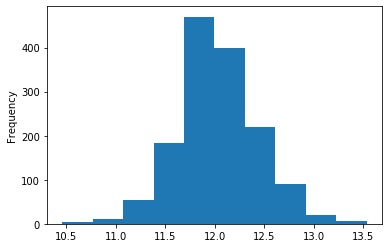

In [30]:
data = pd.read_csv('house-prices-train.csv')
ordinal_cols_mappers = {
    'KitchenQual': {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
}
data = encode_categories(data, ordinal_cols_mappers, dummies=True)
data.fillna('-1', inplace=True)
data.SalePrice = np.log1p(data.SalePrice) # velký rozptyl
data['SalePrice'].plot.hist()
data.shape

 * Zkusme to s DecisionTreeRegressor znovu.

In [13]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(data.drop(columns=['SalePrice']), data.SalePrice)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import train_test_split
def split_data(Xdata, ydata, ratio=0.25, rd_seed=5656):
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state=rd_seed) 
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 
    return Xtrain, Xtest, Xval, ytrain, ytest, yval

In [15]:
Xtrain, Xtest, Xval, ytrain, ytest, yval = split_data(data.drop(columns=['SalePrice']), data.SalePrice)

In [16]:
param_grid = {
    'max_depth': range(1,10)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = DecisionTreeRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = DecisionTreeRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'max_depth': 5}
RMSLE (train): 0.151525
RMSLE (validation): 0.169531
RMSLE (test): 0.214780


## Náhodný les `RandomForestRegressor`

  * Použití lesa místo stromu je `sklearn` velice jednoduché: stačí nahradit `DecisionTreeRegressor` v kódu výše  třídou `RandomForestRegressor`.
  * Má skoro stejné parametry jako `DecisionTreeRegressor`.
  * Má ale také jeden nový (`n_estimators`), který je zásadní a určuje počet stromů v lese.

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
param_grid = {
    'n_estimators': range(1,100,5),
    'max_depth': range(1,5)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = RandomForestRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = RandomForestRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'n_estimators': 76, 'max_depth': 4}
RMSLE (train): 0.147585
RMSLE (validation): 0.149247
RMSLE (test): 0.162818


## AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
param_grid = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = AdaBoostRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = AdaBoostRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'n_estimators': 66, 'learning_rate': 0.5}
RMSLE (train): 0.150850
RMSLE (validation): 0.155214
RMSLE (test): 0.165218


In [21]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 500):
    display(data.head(20))
    display(data.info())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,d_MSZoning_0,d_MSZoning_1,d_MSZoning_2,d_MSZoning_3,d_MSZoning_4,d_Street_0,d_Street_1,d_Alley_0,d_Alley_1,d_Alley_2,d_LotShape_0,d_LotShape_1,d_LotShape_2,d_LotShape_3,d_LandContour_0,d_LandContour_1,d_LandContour_2,d_LandContour_3,d_Utilities_0,d_Utilities_1,d_LotConfig_0,d_LotConfig_1,d_LotConfig_2,d_LotConfig_3,d_LotConfig_4,d_LandSlope_0,d_LandSlope_1,d_LandSlope_2,d_Neighborhood_0,d_Neighborhood_1,d_Neighborhood_2,d_Neighborhood_3,d_Neighborhood_4,d_Neighborhood_5,d_Neighborhood_6,d_Neighborhood_7,d_Neighborhood_8,d_Neighborhood_9,d_Neighborhood_10,d_Neighborhood_11,d_Neighborhood_12,d_Neighborhood_13,d_Neighborhood_14,d_Neighborhood_15,d_Neighborhood_16,d_Neighborhood_17,d_Neighborhood_18,d_Neighborhood_19,d_Neighborhood_20,d_Neighborhood_21,d_Neighborhood_22,d_Neighborhood_23,d_Neighborhood_24,d_Condition1_0,d_Condition1_1,d_Condition1_2,d_Condition1_3,d_Condition1_4,d_Condition1_5,d_Condition1_6,d_Condition1_7,d_Condition1_8,d_Condition2_0,d_Condition2_1,d_Condition2_2,d_Condition2_3,d_Condition2_4,d_Condition2_5,d_Condition2_6,d_Condition2_7,d_BldgType_0,d_BldgType_1,d_BldgType_2,d_BldgType_3,d_BldgType_4,d_HouseStyle_0,d_HouseStyle_1,d_HouseStyle_2,d_HouseStyle_3,d_HouseStyle_4,d_HouseStyle_5,d_HouseStyle_6,d_HouseStyle_7,d_RoofStyle_0,d_RoofStyle_1,d_RoofStyle_2,d_RoofStyle_3,d_RoofStyle_4,d_RoofStyle_5,d_RoofMatl_0,d_RoofMatl_1,d_RoofMatl_2,d_RoofMatl_3,d_RoofMatl_4,d_RoofMatl_5,d_RoofMatl_6,d_RoofMatl_7,d_Exterior1st_0,d_Exterior1st_1,d_Exterior1st_2,d_Exterior1st_3,d_Exterior1st_4,d_Exterior1st_5,d_Exterior1st_6,d_Exterior1st_7,d_Exterior1st_8,d_Exterior1st_9,d_Exterior1st_10,d_Exterior1st_11,d_Exterior1st_12,d_Exterior1st_13,d_Exterior1st_14,d_Exterior2nd_0,d_Exterior2nd_1,d_Exterior2nd_2,d_Exterior2nd_3,d_Exterior2nd_4,d_Exterior2nd_5,d_Exterior2nd_6,d_Exterior2nd_7,d_Exterior2nd_8,d_Exterior2nd_9,d_Exterior2nd_10,d_Exterior2nd_11,d_Exterior2nd_12,d_Exterior2nd_13,d_Exterior2nd_14,d_Exterior2nd_15,d_MasVnrType_0,d_MasVnrType_1,d_MasVnrType_2,d_MasVnrType_3,d_MasVnrType_4,d_ExterQual_0,d_ExterQual_1,d_ExterQual_2,d_ExterQual_3,d_ExterCond_0,d_ExterCond_1,d_ExterCond_2,d_ExterCond_3,d_ExterCond_4,d_Foundation_0,d_Foundation_1,d_Foundation_2,d_Foundation_3,d_Foundation_4,d_Foundation_5,d_BsmtQual_0,d_BsmtQual_1,d_BsmtQual_2,d_BsmtQual_3,d_BsmtQual_4,d_BsmtCond_0,d_BsmtCond_1,d_BsmtCond_2,d_BsmtCond_3,d_BsmtCond_4,d_BsmtExposure_0,d_BsmtExposure_1,d_BsmtExposure_2,d_BsmtExposure_3,d_BsmtExposure_4,d_BsmtFinType1_0,d_BsmtFinType1_1,d_BsmtFinType1_2,d_BsmtFinType1_3,d_BsmtFinType1_4,d_BsmtFinType1_5,d_BsmtFinType1_6,d_BsmtFinType2_0,d_BsmtFinType2_1,d_BsmtFinType2_2,d_BsmtFinType2_3,d_BsmtFinType2_4,d_BsmtFinType2_5,d_BsmtFinType2_6,d_Heating_0,d_Heating_1,d_Heating_2,d_Heating_3,d_Heating_4,d_Heating_5,d_HeatingQC_0,d_HeatingQC_1,d_HeatingQC_2,d_HeatingQC_3,d_HeatingQC_4,d_CentralAir_0,d_CentralAir_1,d_Electrical_0,d_Electrical_1,d_Electrical_2,d_Electrical_3,d_Electrical_4,d_Electrical_5,d_Functional_0,d_Functional_1,d_Functional_2,d_Functional_3,d_Functional_4,d_Functional_5,d_Functional_6,d_FireplaceQu_0,d_FireplaceQu_1,d_FireplaceQu_2,d_FireplaceQu_3,d_FireplaceQu_4,d_FireplaceQu_5,d_GarageType_0,d_GarageType_1,d_GarageType_2,d_GarageType_3,d_GarageType_4,d_GarageType_5,d_GarageType_6,d_GarageFinish_0,d_GarageFinish_1,d_GarageFinish_2,d_GarageFinish_3,d_GarageQual_0,d_GarageQual_1,d_GarageQual_2,d_GarageQual_3,d_GarageQual_4,d_GarageQual_5,d_GarageCond_0,d_GarageCond_1,d_GarageCond_2,d_GarageCond_3,d_GarageCond_4,d_GarageCond_5,d_PavedDrive_0,d_PavedDrive_1,d_PavedDrive_2,d_PoolQC_0,d_PoolQC_1,d_PoolQ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 303 entries, Id to d_SaleCondition_5
dtypes: float64(1), int64(35), object(3), uint8(264)
memory usage: 821.4+ KB


None

# Úkol: zkuste snížit RMSLE jak to jen jde

In [22]:
data = pd.read_csv('house-prices-train.csv')
data.SalePrice = np.log1p(data.SalePrice)

In [35]:
### sem napište svůj kód
### => laděné hyperparametry náhodných lesů

param_grid = {
    'n_estimators': range(100,120,1),
    'max_depth': range(7,10)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = RandomForestRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = RandomForestRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'n_estimators': 109, 'max_depth': 9}
RMSLE (train): 0.067044
RMSLE (validation): 0.119460
RMSLE (test): 0.143232


In [25]:
# kaggle submission
data_test = pd.read_csv('house-prices-train.csv')
ordinal_cols_mappers = {
    'KitchenQual': {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
}
data_test = encode_categories(data_test, ordinal_cols_mappers)
to_drop = [item for item in data_test.columns if item not in data.columns]
to_add = [item for item in data.columns.drop('SalePrice') if item not in data_test.columns]
data_test.drop(columns=to_drop, inplace=True)
data_test[to_add] = pd.DataFrame(0, index=range(data.shape[0]), columns=to_add)
data_test.fillna('-1', inplace=True)
dt = AdaBoostRegressor(**best_params)
dt.fit(Xtrain, ytrain)
ypred = np.expm1(dt.predict(data_test))
kaggle = pd.DataFrame(columns=['Id', 'SalePrice'])
kaggle.Id = data_test.Id
kaggle.SalePrice = ypred
kaggle.to_csv('kaggle_rf.csv', index=False)

ValueError: Number of features of the model must match the input. Model n_features is 302 and input n_features is 81 